# Скачивание данных

In [2]:
!pip3 install jsonlines

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import jsonlines
import pandas as pd
import numpy as np

In [5]:
text = []
with jsonlines.open(r"Data/ranking_train.jsonl", 'r') as reader:
    for obj in  reader:
        text.append(obj)

In [6]:
'''Формат данных следующий... Сначала по ключу 'text' выдаёт тело поста; по ключу 'comments' получаем список, состоящий из словарей следующего вида - по ключу 'text' выдаёт 
тело комментария, а по ключу 'score' получаем оценку от 0 до 4'''
len(text) 

88107

In [7]:
print('Пример вызова тела поста: {}'.format(text[0]['text']) )

Пример вызова тела поста: How many summer Y Combinator fundees decided not to continue with their startup and go back to school? and what were the reasons?


In [8]:
text[0]

{'text': 'How many summer Y Combinator fundees decided not to continue with their startup and go back to school? and what were the reasons?',
 'comments': [{'text': 'Going back to school is not identical with giving up. Some founders go back to school and keep working on the startup while there.  However, those do so much worse than the people who work on the startup full-time that going back to school seems, in practice, not too far removed from a death sentence for a startup.Off the top of my head, I\'d guess we\'ve had about 8 startups where the founders went back to school.  It doesn\'t only happen with summer batches.  Founders from winter batches do it too.Usually the reason is that the startup isn\'t doing very well. However, that judgement depends a lot on how determined the founders are.  One reason we now shy away from funding people still in school is that they often unconsciously want the startup to fail, because the idea of dropping out frightens them.A lot of startups loo

In [9]:
print('Пример вызова тела комментариев: {}'.format(text[0]['comments']) )

Пример вызова тела комментариев: [{'text': 'Going back to school is not identical with giving up. Some founders go back to school and keep working on the startup while there.  However, those do so much worse than the people who work on the startup full-time that going back to school seems, in practice, not too far removed from a death sentence for a startup.Off the top of my head, I\'d guess we\'ve had about 8 startups where the founders went back to school.  It doesn\'t only happen with summer batches.  Founders from winter batches do it too.Usually the reason is that the startup isn\'t doing very well. However, that judgement depends a lot on how determined the founders are.  One reason we now shy away from funding people still in school is that they often unconsciously want the startup to fail, because the idea of dropping out frightens them.A lot of startups look bad after 3 months.  Someone who\'s out of school and has to make it work or get a job in a cubicle will say "don\'t wor

In [10]:
pd_data = pd.DataFrame(columns = ['post', 'comment', 'score'])
i=0
batch_size = 32
def bach_generator(batch_size, text):
    i=0
    batch_idx = np.random.random_integers(0, len(text), batch_size)
    
    data = np.array(text)[[batch_idx]][0]
    
    for body in data:
        for comment in body['comments']:
            pd_data.loc[i] = [body['text'].lower(), comment['text'].lower(), comment['score']]
            i+=1
    return pd_data

    

In [14]:
bach_generator(batch_size, text)

/tmp/ipykernel_1046796/1099541067.py:6: DeprecationWarning: This function is deprecated. Please call randint(0, 88107 + 1) instead
  batch_idx = np.random.random_integers(0, len(text), batch_size)


,post,comment,score
0,who is living off their startup fulltime?,when i started out in 1999 my business partner...,0
1,who is living off their startup fulltime?,s3stat (http://www.s3stat.com) brings in enoug...,1
2,who is living off their startup fulltime?,"hacker monthly (http://hackermonthly.com), sel...",2
3,who is living off their startup fulltime?,http://visualwebsiteoptimizer.com/i have been ...,3
4,who is living off their startup fulltime?,http://www.bingocardcreator.com/stats/sales-by...,4
...,...,...,...
155,how you can do cool image effects using html5 ...,i was expecting this to use webgl shaders.when...,0
156,how you can do cool image effects using html5 ...,if you want to experiment with some filters li...,1
157,how you can do cool image effects using html5 ...,cool article.a made a screencast a few months ...,2
158,how you can do cool image effects using html5 ...,you can see similar stuff on http://sta.sh/mur...,3


In [251]:
'''Перегонка датафрейма в CSV. Этот файл уже висит в репо'''
# pd_data.to_csv (r'my_data.csv', index= False )

'Перегонка датафрейма в CSV. Этот файл уже висит в репо'

# Preprocessing

In [13]:
!pip3 install nltk

Defaulting to user installation because normal site-packages is not writeable
  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 770.4/770.4 KB 7.1 MB/s eta 0:00:004.9 MB/s eta 0:00:01


In [16]:
import string
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from functools import reduce

[nltk_data] Downloading package stopwords to /home/klim/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/klim/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [41]:
stop_w =stopwords.words("english")
ps = PorterStemmer()
pd_data_sent = pd.DataFrame(columns = ['post', 'comment', 'score'])
pd_data_int = pd.DataFrame(columns = ['post', 'comment', 'score'])
dictionary = []
i=0
batch_size = 32

def bach_generator(batch_size, text):
    i=0
    batch_idx = np.random.random_integers(0, len(text), batch_size)
    
    data = np.array(text)[[batch_idx]][0]
    
    for body in data:
        for comment in body['comments']:
            post_text = body['text'].translate(str.maketrans("", "", string.punctuation))
            post_tokens = word_tokenize(post_text)
            
            comment_text = comment['text'].translate(str.maketrans("", "", string.punctuation))
            comment_tokens = word_tokenize(comment_text)
            
            
            stemmed_post = [ps.stem(x) if x not in stop_w else '' for x in post_tokens ]
            stemmed_coment = [ps.stem(x) if x not in stop_w else '' for x in comment_tokens ]
            
            pd_data_sent.loc[i] = [' '.join(stemmed_post), ' '.join(stemmed_coment), comment['score']]
            pd_data_sent.loc[i] = [' '.join(stemmed_post), ' '.join(stemmed_coment), comment['score']]
            i+=1
            
    return pd_data

data = bach_generator(batch_size, text)
data

/tmp/ipykernel_1046796/3286131343.py:11: DeprecationWarning: This function is deprecated. Please call randint(0, 88107 + 1) instead
  batch_idx = np.random.random_integers(0, len(text), batch_size)


,post,comment,score
0,who is living off their startup fulltime?,when i started out in 1999 my business partner...,0
1,who is living off their startup fulltime?,s3stat (http://www.s3stat.com) brings in enoug...,1
2,who is living off their startup fulltime?,"hacker monthly (http://hackermonthly.com), sel...",2
3,who is living off their startup fulltime?,http://visualwebsiteoptimizer.com/i have been ...,3
4,who is living off their startup fulltime?,http://www.bingocardcreator.com/stats/sales-by...,4
...,...,...,...
155,how you can do cool image effects using html5 ...,i was expecting this to use webgl shaders.when...,0
156,how you can do cool image effects using html5 ...,if you want to experiment with some filters li...,1
157,how you can do cool image effects using html5 ...,cool article.a made a screencast a few months ...,2
158,how you can do cool image effects using html5 ...,you can see similar stuff on http://sta.sh/mur...,3


In [71]:
train_target = data['score']
train_data = data['comment']

In [95]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(train_data).toarray()
labels = train_target

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

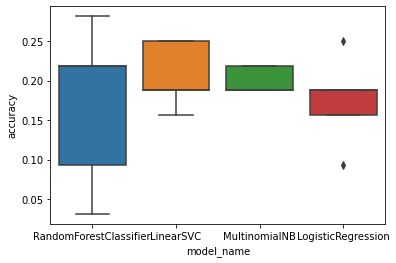

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
plt.show()